# ML-5. Решающие деревья и случайный лес 
## Юнит 6. Основные алгоритмы машинного обучения. Часть II
### Skillfactory: DST-10
---

### Задача 5.2.3
---
Вам предложен датасет */data/bill_authentication.csv* с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Более подробную информацию про датасет, а также сам датасет можно найти здесь: https://archive.ics.uci.edu/ml/datasets/banknote+authentication.

Также можете его скачать напрямую по этой ссылке: https://lms.skillfactory.ru/assets/courseware/v1/ad29ebf5005123a0f5f50399a7bb64fb/asset-v1:Skillfactory+DST-10+22JAN2020+type@asset+block/bill_authentication.csv.

Параметры решающего дерева, которые понадобятся для решения задачи:

- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

Обучите на данных из файла решающее дерево. Целевой переменной здесь является переменная Class. Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. Максимальную глубину дерева примите за 2, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2. Какое значение f1-score вы получили? Округлите до трёх знаков

In [11]:
import pandas as pd
import numpy as np

In [2]:
RANDOM_SEED =17

In [3]:
# Прочитаем data set
df = pd.read_csv('./data/bill_authentication.xls', sep=',')  
df.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
682,3.7321,-3.8840,3.3577,-0.006049,0
103,3.3397,-4.6145,3.9823,-0.237510,0
886,-1.6514,-8.4985,9.1122,1.237900,1
356,2.7206,9.0821,-3.3111,-0.968110,0
226,0.5706,-0.0248,1.2421,-0.562100,0


In [4]:
# Посмотрим на данные 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
# Выделяем признаки и целевую переменную
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [6]:
# Разделим выборку на обучающую и тренировочную
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state=RANDOM_SEED)

In [7]:
# Модель для классификации на основе дерева решений
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=3, 
                                  max_features=2, random_state=RANDOM_SEED)
clf_tree.fit(X_train, Y_train)   # Обучаем

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [8]:
# Вычислим метрики качества
from sklearn.metrics import f1_score

Y_predicted = clf_tree.predict(X_test)  # Предсказываем
print('f1_score =', round(f1_score(Y_test, Y_predicted), 3))


f1_score = 0.866


In [20]:
# Проклассифицируем банкноту с вектором признаков 
# [2.04378,-0.38422,1.437292,0.76421]
# К какому классу она относится?
class_x0 = clf_tree.predict([[2.04378, -0.38422, 1.437292, 0.76421]])
print('Банкнота относится к классу', class_x0)

Банкнота относится к классу [0]


### Задача 5.2.5
---

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива. Датасет лежит здесь: https://lms.skillfactory.ru/assets/courseware/v1/fc8c2fb45f3b0b86d8fe409ff0f430af/asset-v1:Skillfactory+DST-10+22JAN2020+type@asset+block/petrol_consumption.csv.

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева. Вычислите RMSE, округлите до двух знаков после точки-разделителя. Какова глубина дерева?

In [25]:
# Прочитаем data set
df = pd.read_csv('./data/petrol_consumption.xls', sep=',')  
df.sample(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
7,8.0,5126,2138,0.553,467
12,7.0,4817,6930,0.574,525
20,7.0,4593,7834,0.663,649
37,7.0,3897,6385,0.586,704
21,8.0,4983,602,0.602,540


In [26]:
# Посмотрим на данные 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [27]:
# Выделяем признаки и целевую переменную
X = df.drop(['Petrol_Consumption'], axis=1)
Y = df['Petrol_Consumption']

In [28]:
# Разделим выборку на обучающую и тренировочную
RANDOM_SEED = 42
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state=RANDOM_SEED)

In [29]:
# Обучим решающее дерево для регрессии на предложенных данных
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=RANDOM_SEED)
reg_tree.fit(X_train, Y_train)   # Обучаем

DecisionTreeRegressor(random_state=42)

In [31]:
# Подгружаем инструмент для оценки точности модели (MSE)
from sklearn.metrics import mean_squared_error

y_pred = reg_tree.predict(X_test)
rmse = mean_squared_error(Y_test, y_pred)**0.5
print(f'RMSE = {rmse:.2f}')

RMSE = 87.97


In [33]:
# Определим глубину дерева
print('Глубина дерева =', reg_tree.get_depth())

Глубина дерева = 11


### Задача 5.5.2. Задача о винах
---

Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.
Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.
Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.
Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (random_state=42, максимальная глубина равна 10).

Введите значение f1 score для классификатора, который показал наилучшее значение. Округлите до трёх знаков после точки-разделителя.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Прочитаем data set
df = pd.read_csv('./data/winequality-red.csv',  sep=';', quotechar="*", escapechar='"', header=0, 
                names =['fixed acidity',"volatile acidity","citric acid","residual sugar", 
                        "chlorides", "free sulfur dioxide","total sulfur dioxide","density",
                        "pH","sulphates","alcohol","quality"])

# Хорошим вином будем называть называть вино, параметр quality которого не менее 6
df['quality']=df['quality'].apply(lambda x: 0 if x<6 else 1)

In [3]:
# Выделяем признаки и целевую переменную
X = df.drop(['quality'], axis=1)
y = df['quality']

# Разобьем выборку на обучающую и тренировочную с параметрами 
# test_size=0.30, random_state=42
RANDOM_SEED = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=RANDOM_SEED)

In [4]:
# Обучим логистическую регрессию (с дефолтными параметрами)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)   # Обучаем
y_pred_lr = lr.predict(X_test)  # Предсказываем

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
# Обучим решающее дерево (random_state=42, максимальная глубина равна 10)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=10)
dtc.fit(X_train, y_train)   # Обучаем
y_pred_dtc = dtc.predict(X_test)  # Предсказываем

In [6]:
# Вычислим метрики качества
from sklearn.metrics import f1_score

f1_lr = f1_score(y_test, y_pred_lr)
f1_dtc = f1_score(y_test, y_pred_dtc)
print('f1_score_lr =', round(f1_lr, 3))
print('f1_score_dtc =', round(f1_dtc, 3))

f1_score_lr = 0.753
f1_score_dtc = 0.793


In [9]:
# Обучим модель с использование бэггинга 
from sklearn.ensemble import BaggingClassifier

bggc = BaggingClassifier(base_estimator=dtc, n_estimators=1500, 
                         random_state=RANDOM_SEED)
bggc.fit(X_train, y_train)
y_pred_bggc = bggc.predict(X_test)
f1_bggc = f1_score(y_test, y_pred_bggc)
print(f"f1_score_bggc:= {round(f1_bggc,3)}")

f1_score_bggc:= 0.818


## ПРАКТИКА 5.7
---

* Загрузите датасет **digits** с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков и ответы на обучающей выборке (вам потребуются поля data и target в объекте, который возвращает load_digits).

* Информацию о датасете вы можете получить, обратившись к полю DESCR у возвращаемого объекта load_digits. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

* Для оценки качества мы будем использовать cross_val_score из sklearn.model_selection с параметром  𝑐𝑣=10 . Эта функция реализует k-fold cross validation c  𝑘  равным значению параметра  𝑐𝑣 . Предлагается использовать  𝑘=10 , чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и  𝑘=5 . Функция cross_val_score будет возвращать numpy.ndarray, в котором будет  𝑘  чисел — качество в каждом из  𝑘  экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление cross_val_score, следует попробовать использовать параметр n_jobs. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать n_jobs = -1, тогда будут задействовано максимальное число потоков.


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits['data'].shape

(1797, 64)

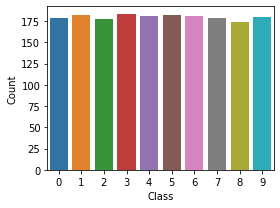

In [8]:
# Посмотрим на распределение объектов по классам
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.countplot(digits.target)
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

In [9]:
# Сформируем зависимую и независимую переменные
X = digits.data
y = digits.target

### Задание 5.7.1
1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).

In [20]:
# Обучим решающее дерево для классификации на предложенных данных
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dtc, X, y, cv=10, n_jobs=-1)
print('Качество в каждом разбиении: ', cv_score)
print('Среднее по кросс-валидации: ', cv_score.mean()) 

Качество в каждом разбиении:  [0.77222222 0.85555556 0.81111111 0.78333333 0.78888889 0.88888889
 0.89444444 0.81564246 0.82681564 0.83240223]
Среднее по кросс-валидации:  0.8269304779639975


2. Теперь давайте обучим BaggingClassifier на основе DecisionTreeClassifier. Из sklearn.ensemble импортируйте BaggingClassifier, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным 100.

В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [22]:
from sklearn.ensemble import BaggingClassifier
bggc = BaggingClassifier(base_estimator=dtc, n_estimators=100)

cv_score = cross_val_score(bggc, X, y, cv=10, n_jobs=-1)
print('Качество в каждом разбиении: ', cv_score)
print('Среднее по кросс-валидации: ', cv_score.mean()) 

Качество в каждом разбиении:  [0.86111111 0.96666667 0.91111111 0.92222222 0.92777778 0.98333333
 0.96111111 0.91620112 0.86592179 0.91620112]
Среднее по кросс-валидации:  0.9231657355679701


3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех  $d$ признаках, а на $\sqrt{d}$  случайных признаках.
В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, $\log{d}$ тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [32]:
bggc_sqrt_features = BaggingClassifier(dtc, n_estimators=100, 
                                       max_features=int((X.shape[1])**0.5))
cv_score = cross_val_score(bggc_sqrt_features, X, y, cv=10, n_jobs=-1)
print('Качество в каждом разбиении: ', cv_score)
print('Среднее по кросс-валидации: ', cv_score.mean()) 

Качество в каждом разбиении:  [0.9        0.96666667 0.93888889 0.89444444 0.96111111 0.92777778
 0.96666667 0.96648045 0.90502793 0.92178771]
Среднее по кросс-валидации:  0.934885164494103


4. В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из BaggingClassifier в DecisionTreeClassifier. Для этого вам из документации нужно выяснить, какой параметр DecisionTreeClassifier за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

По-прежнему сэмплируем $sqrt(d)$ признаков.

In [33]:
random_dtc = DecisionTreeClassifier(splitter='random', 
                                    max_features=int((X.shape[1])**0.5))
random_bggc = BaggingClassifier(base_estimator=random_dtc, n_estimators=100)
cv_score = cross_val_score(random_bggc, X, y, cv=10, n_jobs=-1)
print('Качество в каждом разбиении: ', cv_score)
print('Среднее по кросс-валидации: ', cv_score.mean()) 

Качество в каждом разбиении:  [0.91666667 0.97222222 0.93888889 0.93888889 0.96111111 0.96666667
 0.98333333 0.98882682 0.94972067 0.93854749]
Среднее по кросс-валидации:  0.9554872749844817


Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(X, y)
rfc.oob_score_.mean()

0.9744017807456873

In [50]:
count_depth = []
mean_score = []
for i in range(1,30):
    random_forest = RandomForestClassifier(
        n_estimators=100,
        max_features=int((X.shape[1])**0.5),
        max_depth=i,
        oob_score=True,
        n_jobs=-1
    )
    random_forest.fit(X, y)
    random_forest.oob_score_.mean()
    
    count_depth.append(i)
    mean_score.append(random_forest.oob_score_.mean())

Text(0, 0.5, 'Качество модели')

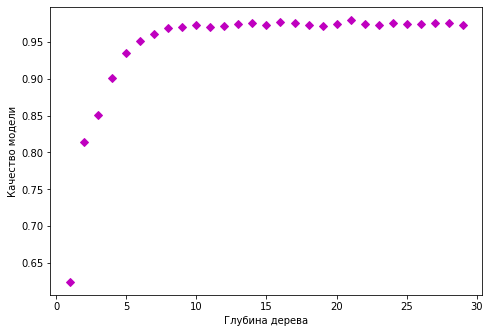

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(count_depth, mean_score, 'mD')
plt.xlabel('Глубина дерева')
plt.ylabel('Качество модели')